**TASk 6**

In [8]:
import nltk
from nltk.util import ngrams
from nltk.lm import Laplace
from nltk.tokenize import word_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline

# Download punkt tokenizer
nltk.download('punkt')

# Function to train N-gram model with Laplace smoothing
def ngram_smoothing(sentence, n):
    tokens = word_tokenize(sentence.lower())  # tokenize
    # For NLTK LM, training data should be a list of lists of tokens
    train_data, padded_sents = padded_everygram_pipeline(n, [tokens])
    model = Laplace(n)
    model.fit(train_data, padded_sents)
    return model, tokens

# Input
sentence = input("Enter a sentence: ")
n = int(input("Enter the value of N for N-grams: "))

# Train model
model, tokens = ngram_smoothing(sentence, n)

# Get context (last n-1 words)
if n > 1:
    context = tuple(tokens[-n+1:])
else:
    context = ()

# Generate 3 next words
next_words = model.generate(3, text_seed=context)

print("Next words:", ' '.join(next_words))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter a sentence: I have a dog it is my
Enter the value of N for N-grams: 2
Next words: </s> it is


**TASK 7**

In [4]:
import nltk
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.corpus import treebank

# Download required resources
nltk.download('treebank')
nltk.download('punkt')

# Load dataset
corpus = list(treebank.tagged_sents())
train_data = corpus[:3000]
test_data = corpus[3000:]

# Train HMM tagger
trainer = HiddenMarkovModelTrainer()
hmm_tagger = trainer.train(train_data)

# Input a sentence from user
sentence = input("Enter a sentence: ")
tokens = nltk.word_tokenize(sentence)

# POS tagging
tagged_sentence = hmm_tagger.tag(tokens)
print("Tagged Sentence:", tagged_sentence)


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter a sentence: this is a pen


/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


Tagged Sentence: [('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('pen', 'NNP')]


/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


**Task 8**

In [5]:
import nltk
from nltk.corpus import treebank
from nltk.tag import hmm

# Download necessary NLTK resources
nltk.download('treebank')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_treebank_pos_tagger')

# Load corpus
corpus = list(treebank.tagged_sents())

# Train-test split
train_data = corpus[:int(0.8 * len(corpus))]
test_data = corpus[int(0.8 * len(corpus)):]

# Train HMM Tagger
hmm_trainer = hmm.HiddenMarkovModelTrainer()
hmm_tagger = hmm_trainer.train(train_data)

# Evaluate
hmm_accuracy = hmm_tagger.accuracy(test_data)
print(f"HMM Tagger Accuracy: {hmm_accuracy:.4f}")



[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


HMM Tagger Accuracy: 0.3647


**TASK 9**

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.



Training HMM Tagger...


/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.12/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


HMM Accuracy: 0.3647387594191327

Evaluating Perceptron Tagger...
Perceptron Accuracy: 0.8937072708218973

Training MaxEnt Tagger (small subset for speed)...


/usr/local/lib/python3.12/dist-packages/nltk/classify/maxent.py:1380: RuntimeWarning: overflow encountered in power
  exp_nf_delta = 2**nf_delta
/usr/local/lib/python3.12/dist-packages/nltk/classify/maxent.py:1382: RuntimeWarning: invalid value encountered in multiply
  sum1 = numpy.sum(exp_nf_delta * A, axis=0)
/usr/local/lib/python3.12/dist-packages/nltk/classify/maxent.py:1383: RuntimeWarning: invalid value encountered in multiply
  sum2 = numpy.sum(nf_exp_nf_delta * A, axis=0)
/usr/local/lib/python3.12/dist-packages/nltk/classify/maxent.py:1390: RuntimeWarning: invalid value encountered in divide
  deltas -= (ffreq_empirical - sum1) / -sum2


MaxEnt Accuracy: 0.8613861386138614

===== Final Results =====
HMM Accuracy        : 0.3647
Perceptron Accuracy : 0.8937
MaxEnt Accuracy     : 0.8614

Generating confusion matrix for Perceptron vs Gold...


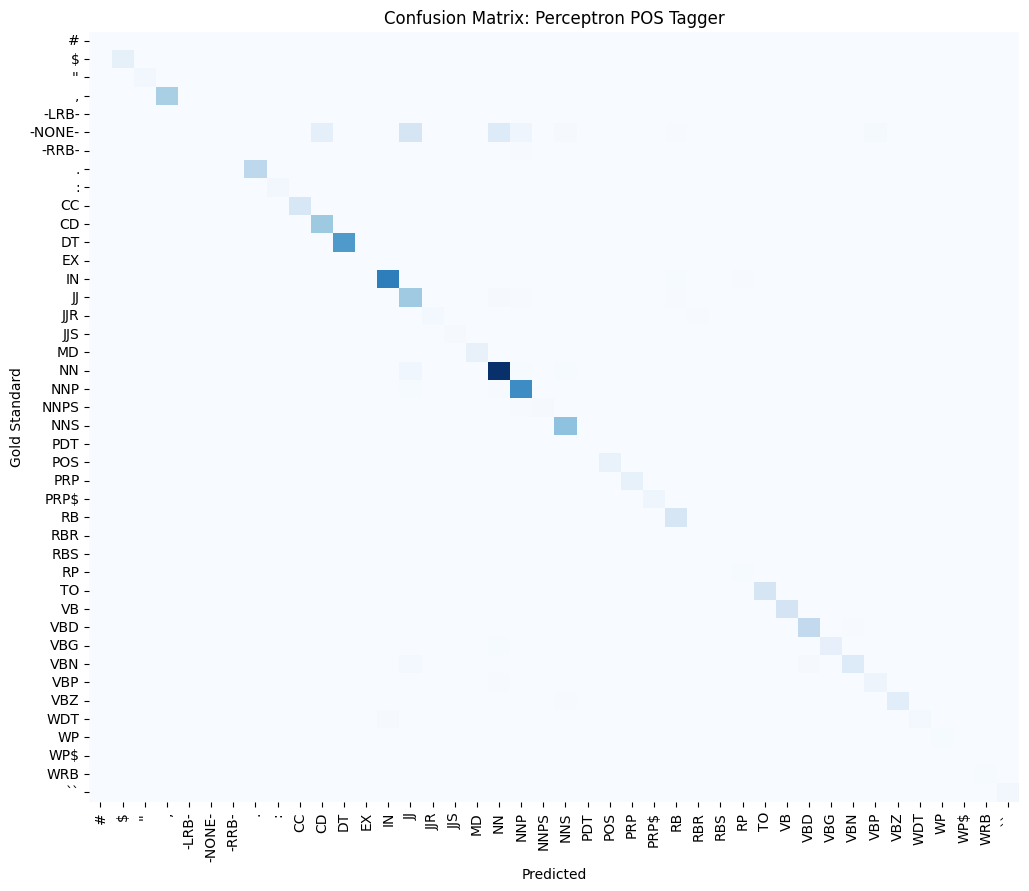

In [1]:
import nltk
from nltk.corpus import treebank
from nltk.tag.hmm import HiddenMarkovModelTrainer
from nltk.tag import PerceptronTagger
from nltk.classify import MaxentClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# Download required resources
# ===============================
nltk.download('treebank')
nltk.download('punkt')
nltk.download('punkt_tab')  # fix for new NLTK
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# ===============================
# Load dataset
# ===============================
corpus = list(treebank.tagged_sents())
train_data = corpus[:int(0.8 * len(corpus))]
test_data = corpus[int(0.8 * len(corpus)):]

# ===============================
# HMM Tagger
# ===============================
print("\nTraining HMM Tagger...")
hmm_trainer = HiddenMarkovModelTrainer()
hmm_tagger = hmm_trainer.train(train_data)

hmm_preds, hmm_gold = [], []
for sent in test_data:
    words = [w for w, t in sent]
    gold_tags = [t for w, t in sent]
    pred_tags = [t for w, t in hmm_tagger.tag(words)]
    hmm_preds.extend(pred_tags)
    hmm_gold.extend(gold_tags)
hmm_acc = accuracy_score(hmm_gold, hmm_preds)
print("HMM Accuracy:", hmm_acc)

# ===============================
# Perceptron Tagger
# ===============================
print("\nEvaluating Perceptron Tagger...")
perc_tagger = PerceptronTagger()
perc_preds, perc_gold = [], []
for sent in test_data:
    words = [w for w, t in sent]
    gold_tags = [t for w, t in sent]
    pred_tags = [t for w, t in perc_tagger.tag(words)]
    perc_preds.extend(pred_tags)
    perc_gold.extend(gold_tags)
perc_acc = accuracy_score(perc_gold, perc_preds)
print("Perceptron Accuracy:", perc_acc)

# ===============================
# MaxEnt (Log-linear) Tagger
# ===============================
print("\nTraining MaxEnt Tagger (small subset for speed)...")

def pos_features(sentence, i):
    word = sentence[i]
    return {
        "word": word,
        "is_first": i == 0,
        "is_last": i == len(sentence) - 1,
        "prev_word": "" if i == 0 else sentence[i - 1],
        "next_word": "" if i == len(sentence) - 1 else sentence[i + 1],
        "is_capitalized": word[0].upper() == word[0],
        "suffix-1": word[-1:],
        "suffix-2": word[-2:],
    }

# Train on smaller subset for speed
train_feats = []
for sent in train_data[:2000]:  # limit size
    words, tags = zip(*sent)
    for i in range(len(words)):
        train_feats.append((pos_features(words, i), tags[i]))

maxent_classifier = MaxentClassifier.train(train_feats, algorithm="iis", max_iter=10, trace=0)

# Evaluate on smaller test set
maxent_preds, maxent_gold = [], []
for sent in test_data[:500]:
    words, tags = zip(*sent)
    for i in range(len(words)):
        pred = maxent_classifier.classify(pos_features(words, i))
        maxent_preds.append(pred)
        maxent_gold.append(tags[i])
maxent_acc = accuracy_score(maxent_gold, maxent_preds)
print("MaxEnt Accuracy:", maxent_acc)

# ===============================
# Final Comparison
# ===============================
print("\n===== Final Results =====")
print(f"HMM Accuracy        : {hmm_acc:.4f}")
print(f"Perceptron Accuracy : {perc_acc:.4f}")
print(f"MaxEnt Accuracy     : {maxent_acc:.4f}")

# ===============================
# Confusion Matrix Heatmap
# ===============================
print("\nGenerating confusion matrix for Perceptron vs Gold...")
labels = sorted(list(set(perc_gold)))
cm = confusion_matrix(perc_gold, perc_preds, labels=labels)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, cmap="Blues", cbar=False)
plt.title("Confusion Matrix: Perceptron POS Tagger")
plt.xlabel("Predicted")
plt.ylabel("Gold Standard")
plt.show()


**TAsk 10**

In [2]:
from bs4 import BeautifulSoup
import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

def pos_tag_and_extract_info(text):
    doc = nlp(text)
    nouns, verbs, adjectives, entities = [], [], [], []

    for token in doc:
        if token.pos_ == "NOUN":
            nouns.append(token.text)
        elif token.pos_ == "VERB":
            verbs.append(token.text)
        elif token.pos_ == "ADJ":
            adjectives.append(token.text)

    for entity in doc.ents:
        entities.append((entity.text, entity.label_))

    return nouns, verbs, adjectives, entities

# Example HTML document
web_document = """
<html>
<head>
<title>Example Web Page</title>
</head>
<body>
<p>This is an example web page. It contains some text with various parts of speech.</p>
<p>For example, "The cat jumps over the lazy dog" contains a noun, a verb, and prepositions.</p>
</body>
</html>
"""

# Extract text from HTML
def extract_text_from_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    return soup.get_text()

# Run processing
text_content = extract_text_from_html(web_document)
nouns, verbs, adjectives, entities = pos_tag_and_extract_info(text_content)

print("Nouns:", nouns)
print("Verbs:", verbs)
print("Adjectives:", adjectives)
print("Entities:", entities)

Nouns: ['Web', 'example', 'web', 'page', 'text', 'parts', 'speech', 'example', 'cat', 'dog', 'verb', 'prepositions']
Verbs: ['contains', 'jumps', 'contains']
Adjectives: ['various', 'lazy']
Entities: []


** task 11**

In [10]:
import re
import requests
import torch
import torch.nn as nn
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the PyTorch model
class ChunkerModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.lstm = nn.LSTM(128, 64, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return torch.sigmoid(self.fc(lstm_out[:, -1, :]))

# Function to fetch text from a URL
def fetch_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    text = ' '.join(p.get_text() for p in soup.find_all('p'))
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text

# Preprocess text using Keras Tokenizer
def preprocess(text):
    tok = Tokenizer(num_words=5000)
    tok.fit_on_texts([text])
    sequences = tok.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=100, padding='post')
    return padded, tok

# Segment text into chunks
def segment_text(url):
    text = fetch_text(url)
    seq, tok = preprocess(text)
    # Split into sentences and take first 5
    chunks = text.split('. ')[:5]
    return chunks

# Example usage
url = "https://en.wikipedia.org/wiki/Natural_language_processing"
chunks = segment_text(url)

print("Extracted Chunks:")
for c in chunks:
    print(c)


Extracted Chunks:

